<a href="https://colab.research.google.com/github/PavloZakala/CV_2024/blob/main/CV_topic_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/CV/'

Mounted at /content/gdrive


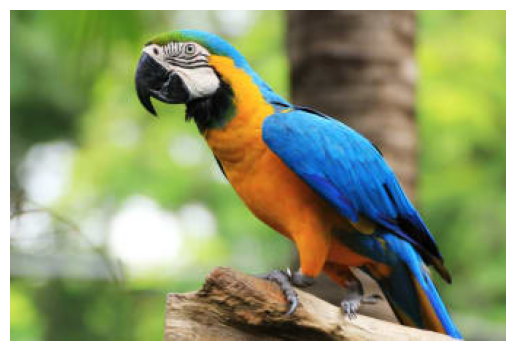

In [ ]:
import os
import matplotlib.pyplot as plt

parrot_image = plt.imread(os.path.join(root_path, r"images/parrot.jpg"))
plt.imshow(parrot_image)
plt.axis('off')
plt.show()

Градієнт зображення

<table>
  <tr>
    <td> <img src="https://wallpaperset.com/w/full/9/8/1/183014.jpg", width = 640px></td>
    <td> <img src="https://e1.pxfuel.com/desktop-wallpaper/252/760/desktop-wallpaper-backgrounds-full-group-with-56-items-nature-background-full-screen.jpg" width = 640px></td>
   </tr>
   <tr>
      <td><img src="https://e0.pxfuel.com/wallpapers/574/363/desktop-wallpaper-beautiful-bird-cool-beautiful-bird.jpg" width = 640px></td>
      <td><img src="https://e0.pxfuel.com/wallpapers/532/572/desktop-wallpaper-nature-minimalist-style.jpg" width = 640px></td>
  </tr>
</table>

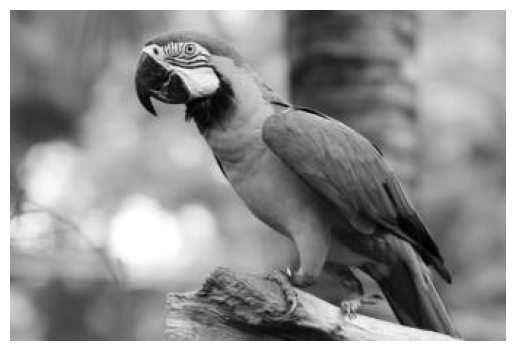

In [ ]:
import numpy as np
from scipy import signal
import cv2

gray_image = cv2.cvtColor(parrot_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap="gray")
plt.axis('off')
plt.show()

# kernal = np.array([[1.2, 1.5, 1.2],
#                      [1.5, 2.0, 1.5],
#                      [1.2, 1.5, 1.2]])
# kernal = kernal / kernal.sum()
# gray_image = signal.convolve2d(gray_image, kernal)

# plt.imshow(gray_image, cmap="gray")
# plt.axis('off')
# plt.show()


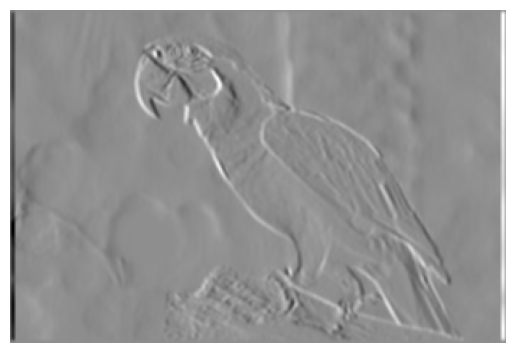

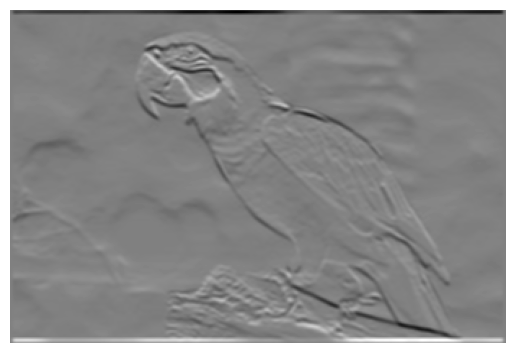

In [ ]:
x_kernal = np.array([[-1.0, 0.0, 1.0],
                     [-2.0, 0.0, 2.0],
                     [-1.0, 0.0, 1.0]])
y_kernal = np.array([[-1.0, -2.0, -1.0],
                     [0.0, 0.0, 0.0],
                     [1.0, 2.0, 1.0]])

Ix = signal.convolve2d(gray_image, x_kernal)
Iy = signal.convolve2d(gray_image, y_kernal)

plt.imshow(Ix, cmap="gray")
plt.axis('off')
plt.show()

plt.imshow(Iy, cmap="gray")
plt.axis('off')
plt.show()

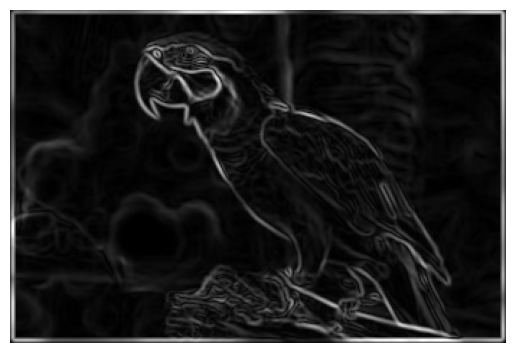

In [ ]:
G = (Ix ** 2.0 + Iy ** 2.0) ** 0.5

plt.imshow(G, cmap="gray")
plt.axis('off')
plt.show()

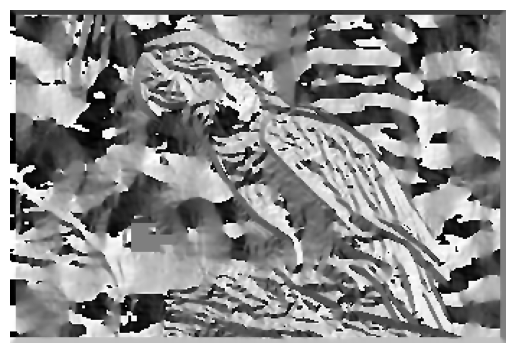

In [ ]:
theta = np.arctan2(Iy, Ix)

plt.imshow(theta, cmap="gray")
plt.axis('off')
plt.show()

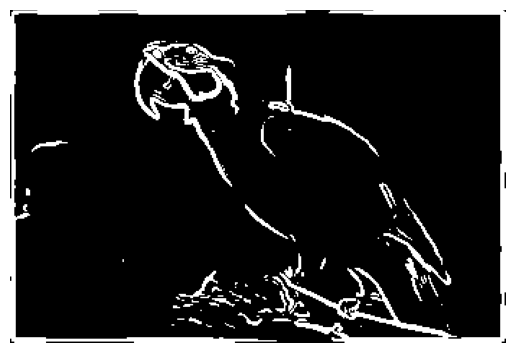

In [ ]:
G_bin = (G / G.max() > 0.21).astype(np.float32)

plt.imshow(G_bin, cmap="gray")
plt.axis('off')
plt.show()

# Алгоритм Кенні

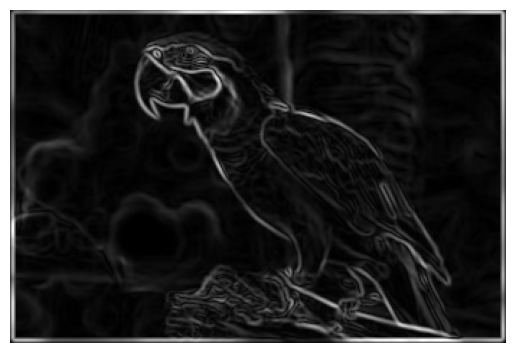

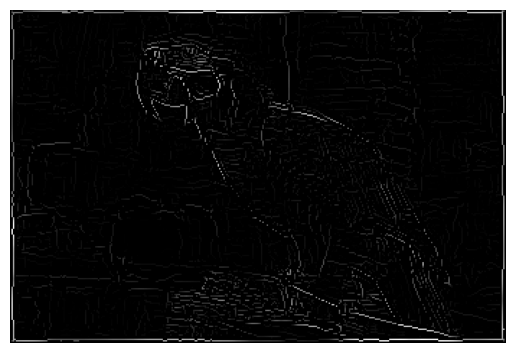

In [ ]:
M, N = G.shape
G_sup = np.zeros_like(G)
angle = theta * 180. / np.pi
angle[angle < 0] += 180

for i in range(1,M-1):
    for j in range(1,N-1):
        q = 255
        r = 255

        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            r = G[i, j-1]
            q = G[i, j+1]

        elif (22.5 <= angle[i,j] < 67.5):
            r = G[i-1, j+1]
            q = G[i+1, j-1]

        elif (67.5 <= angle[i,j] < 112.5):
            r = G[i-1, j]
            q = G[i+1, j]

        elif (112.5 <= angle[i,j] < 157.5):
            r = G[i+1, j+1]
            q = G[i-1, j-1]

        if (G[i,j] >= q) and (G[i,j] >= r):
            G_sup[i,j] = G[i,j]
        else:
            G_sup[i,j] = 0

plt.imshow(G, cmap="gray")
plt.axis('off')
plt.show()

plt.imshow(G_sup, cmap="gray")
plt.axis('off')
plt.show()

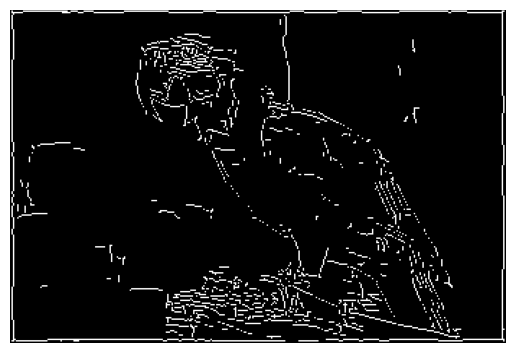

In [ ]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    '''
    Double threshold
    '''

    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)


def hysteresis(img, weak, strong=255):
    M, N = img.shape

    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i, j] == weak):
                if (
                    (img[i+1, j-1] == strong) or (img[i+1, j] == strong) or
                    (img[i+1, j+1] == strong) or (img[i, j-1] == strong) or
                    (img[i, j+1] == strong) or (img[i-1, j-1] == strong) or
                    (img[i-1, j] == strong) or (img[i-1, j+1] == strong)
                ):
                    img[i, j] = strong
                else:
                    img[i, j] = 0
    return img

edges = hysteresis(*threshold(G_sup, lowThresholdRatio=0.07, highThresholdRatio=0.13))

plt.imshow(edges, cmap="gray")
plt.axis('off')
plt.show()

[4.         6.64575131 7.46410162 7.87298335 8.         7.87298335
 7.46410162 6.64575131 4.        ]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]]


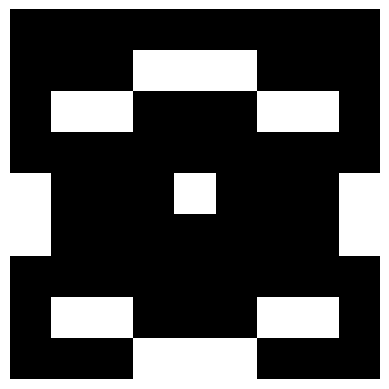

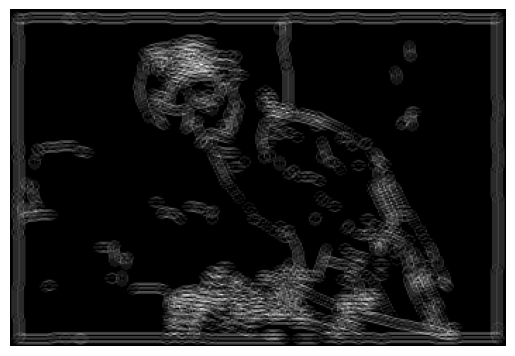

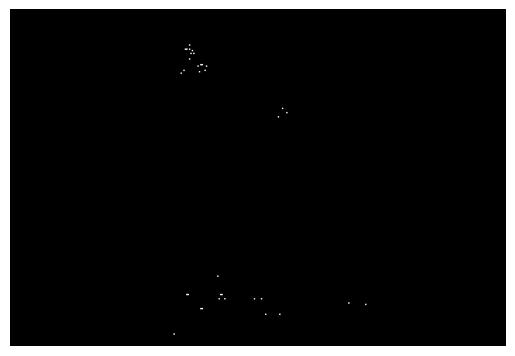

In [ ]:
eye_kernal = np.array([[0.0, 1.0, 1.0, 1.0, 0.0],
                      [1.0, 0.0, 0.0, 0.0, 1.0],
                      [1.0, 0.0, 0.0, 0.0, 1.0],
                      [1.0, 0.0, 0.0, 0.0, 1.0],
                      [0.0, 1.0, 1.0, 1.0, 0.0], ])

def circle(size=5):
  xs = np.linspace(0.0, size-1, size)
  ys = ((size // 2.0) ** 2.0 - (xs - size // 2.0) ** 2.0) ** 0.5 + size // 2.0
  print(ys)
  kernal = np.zeros((size, size), dtype=np.float32)

  for i in range(size):
    kernal[round(ys[i]), round(xs[i])] = 1.0
    kernal[round(-ys[i] + size), round(xs[i])] = 1.0

  return kernal

size = 9
eye_kernal = circle(size)
eye_kernal[size // 2, size // 2] = 1
print(eye_kernal)


plt.imshow(eye_kernal, cmap="gray")
plt.axis('off')
plt.show()


eye_detector = signal.convolve2d(edges, eye_kernal) / 255

plt.imshow(eye_detector, cmap="gray")
plt.axis('off')
plt.show()

res = eye_detector > eye_detector.max() * 0.75
plt.imshow(res, cmap="gray")
plt.axis('off')
plt.show()

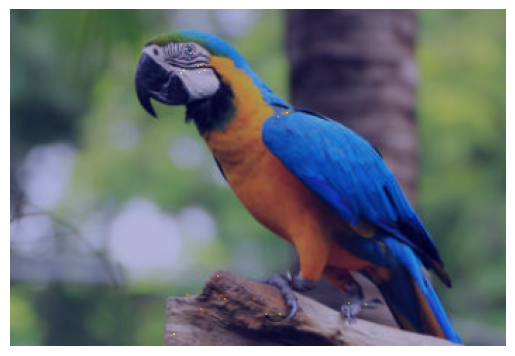

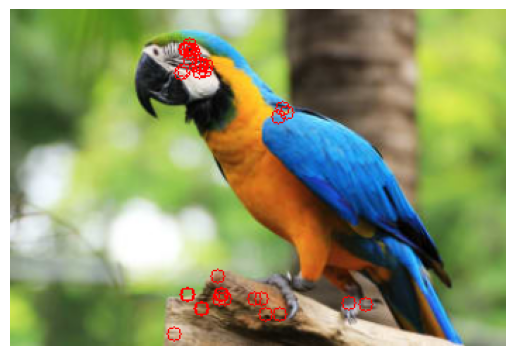

In [ ]:
parrot_image_resized = cv2.resize(parrot_image, (res.shape[1], res.shape[0]))
plt.imshow(parrot_image_resized)
plt.imshow(res, cmap='jet', alpha=0.3)

plt.axis('off')
plt.show()

for i in range(res.shape[0]):
    for j in range(res.shape[1]):
      if res[i, j] == 1:
        cv2.circle(parrot_image_resized, (j, i), 5, (255, 0, 0), 1)

plt.imshow(parrot_image_resized)

plt.axis('off')
plt.show()

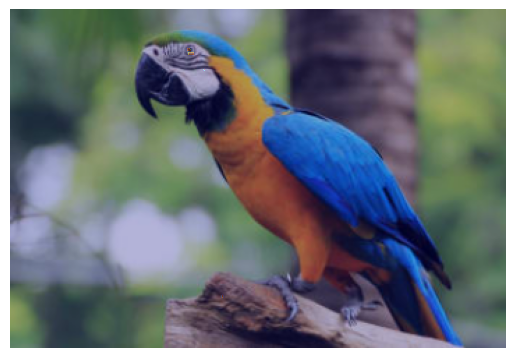

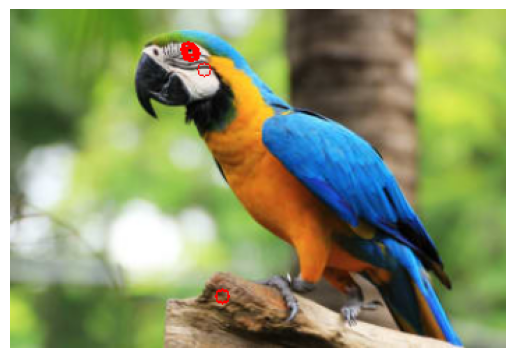

In [ ]:
kernal = np.ones((5, 5), dtype=np.float32)
res_cleaning = signal.convolve2d(res, kernal) > kernal.sum() * 0.13

parrot_image_resized = cv2.resize(parrot_image, (res_cleaning.shape[1], res_cleaning.shape[0]))
plt.imshow(parrot_image_resized)
plt.imshow(res_cleaning, cmap='jet', alpha=0.3)

plt.axis('off')
plt.show()

for i in range(res_cleaning.shape[0]):
    for j in range(res_cleaning.shape[1]):
      if res_cleaning[i, j] == 1:
        cv2.circle(parrot_image_resized, (j, i), 5, (255, 0, 0), 1)

plt.imshow(parrot_image_resized)

plt.axis('off')
plt.show()

## Метод Оцу

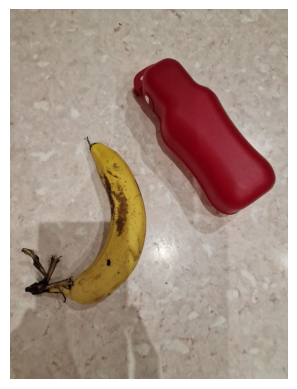

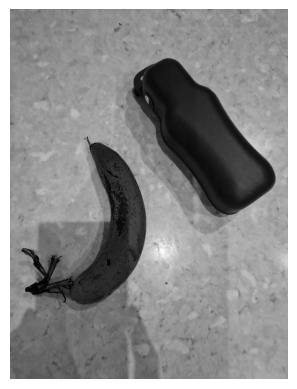

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

example_image = plt.imread(os.path.join(root_path, r"images/example1.jpg"))
plt.imshow(example_image, cmap="gray")
plt.axis('off')
plt.show()

# example_image_gray = cv2.cvtColor(example_image, cv2.COLOR_RGB2GRAY)
example_image_gray = example_image[:, :, 2]
plt.imshow(example_image_gray, cmap="gray")
plt.axis('off')
plt.show()

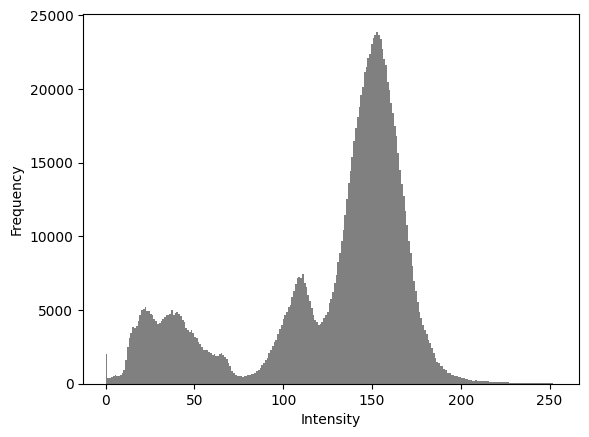

In [ ]:
plt.hist(example_image_gray.reshape(-1), bins=255, color="gray")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

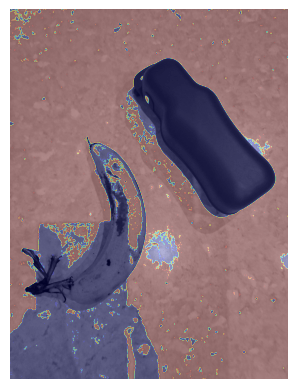

In [ ]:
value_min = 140
value_max = 200
image_map = (value_min <= example_image_gray) & (example_image_gray < value_max)

plt.imshow(example_image_gray, cmap="gray")
plt.imshow(image_map, cmap='jet', alpha=0.3)

plt.axis('off')
plt.show()

In [ ]:
# https://medium.com/geekculture/image-thresholding-from-scratch-a66ae0fb6f09
import numpy as np

def otsy_method(image):

  def _compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

  threshold_range = np.arange(np.max(image)+1)
  criterias = np.array([_compute_otsu_criteria(image.copy(), th) for th in threshold_range])

  # best threshold is the one minimizing the Otsu criteria
  best_threshold = threshold_range[np.argmin(criterias)]

  binary = image.copy()
  binary[binary >= best_threshold] = 255
  binary[binary < best_threshold] = 0

  return binary, best_threshold


binary_example_image, threshold = otsy_method(example_image_gray)

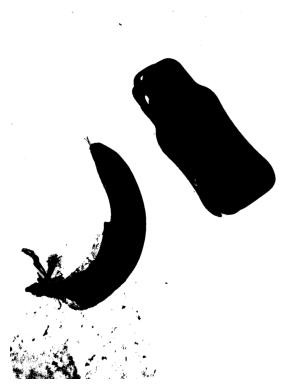

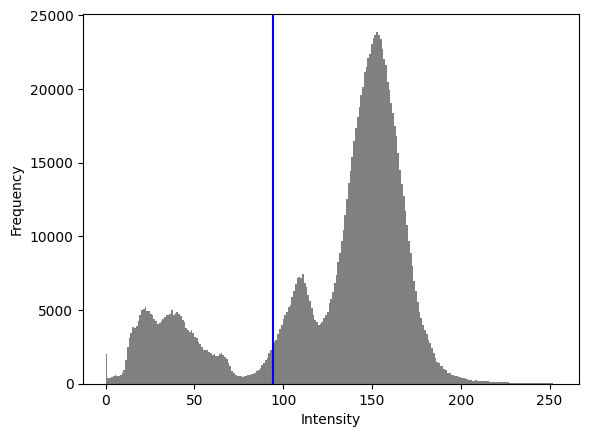

In [ ]:
plt.imshow(binary_example_image, cmap="gray")
plt.axis('off')
plt.show()

plt.hist(example_image_gray.reshape(-1), bins=255, color="gray")
plt.axvline(x = threshold, color = 'b')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

## Зв'язність компонент

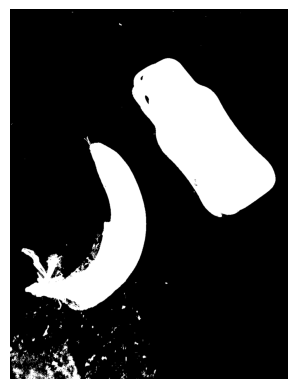

In [ ]:
# resized_image = cv2.resize(binary_example_image,
#                 (binary_example_image.shape[1] // 4, binary_example_image.shape[0] // 4))
resized_image = 255 - binary_example_image

plt.imshow(resized_image, cmap="gray")
plt.axis('off')
plt.show()

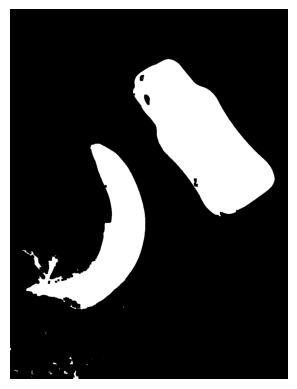

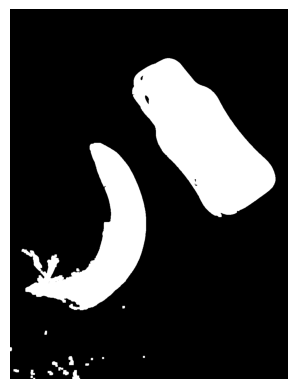

In [ ]:
# https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html


kernal = np.ones((7, 7),np.uint8)
resized_image = cv2.erode(resized_image, kernal)

plt.imshow(resized_image, cmap="gray")
plt.axis('off')
plt.show()

resized_image = cv2.dilate(resized_image, kernal)

plt.imshow(resized_image, cmap="gray")
plt.axis('off')
plt.show()

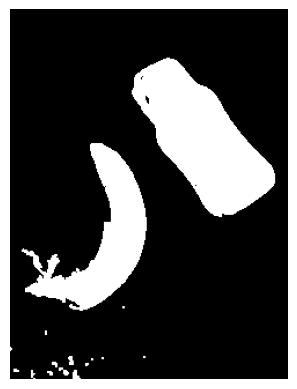

In [ ]:
resized_image = (cv2.resize(resized_image,
                (binary_example_image.shape[1] // 4, binary_example_image.shape[0] // 4)) > 127) * 255

plt.imshow(resized_image, cmap="gray")
plt.axis('off')
plt.show()

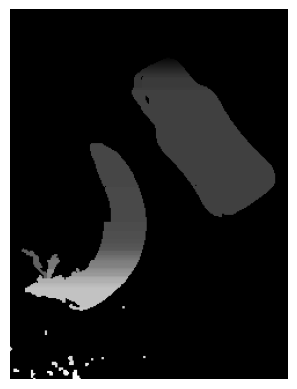

In [ ]:
components_image = np.zeros_like(resized_image, dtype=np.uint32)

component_id = 3
for i in range(resized_image.shape[0]):
  for j in range(resized_image.shape[1]):
    if resized_image[i, j] == 255:

      max_id = max(
          components_image[max(0, i-1), j],
          components_image[i, max(j-1, 0)],
          components_image[i, min(j+1, resized_image.shape[1] - 1)],
          components_image[min(i+1, resized_image.shape[0] - 1), j])

      if max_id == 0:
        components_image[i, j] = component_id
        component_id += 1
      else:
        components_image[i, j] = max_id

      # plt.imshow(components_image, cmap="gray")
      # plt.axis('off')
      # plt.show()

plt.imshow(components_image, cmap="gray")
plt.axis('off')
plt.show()

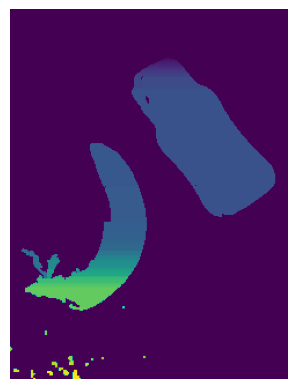

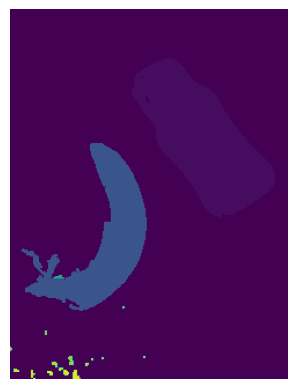

In [ ]:
plt.imshow(components_image)
plt.axis('off')
plt.show()

for i in range(resized_image.shape[0]):
  for j in range(resized_image.shape[1]):
    if resized_image[i, j] == 255:
      comp_id_list = []
      for comp_id in [components_image[max(0, i-1), j],
            components_image[i, max(j-1, 0)],
            components_image[i, min(j+1, resized_image.shape[1] - 1)],
            components_image[min(i, resized_image.shape[0] - 1), j]]:
        if comp_id != 0:
          comp_id_list.append(comp_id)

      if not len(comp_id_list):
        continue

      component_id = np.min(comp_id_list)

      if component_id != components_image[i, j]:
        components_image[components_image == components_image[i, j]] = component_id

plt.imshow(components_image)
plt.axis('off')
plt.show()

In [ ]:
for id in range(1, components_image.max() + 1):
  print(id, (components_image == id).sum())

  if ((components_image == id).sum() < components_image.size * 0.05):
    components_image[components_image == id] = 0
    print("cancel mask")

1 0
cancel mask
2 0
cancel mask
3 8553
4 0
cancel mask
5 0
cancel mask
6 0
cancel mask
7 0
cancel mask
8 0
cancel mask
9 0
cancel mask
10 0
cancel mask
11 0
cancel mask
12 0
cancel mask
13 0
cancel mask
14 0
cancel mask
15 0
cancel mask
16 0
cancel mask
17 0
cancel mask
18 0
cancel mask
19 0
cancel mask
20 0
cancel mask
21 0
cancel mask
22 0
cancel mask
23 5607


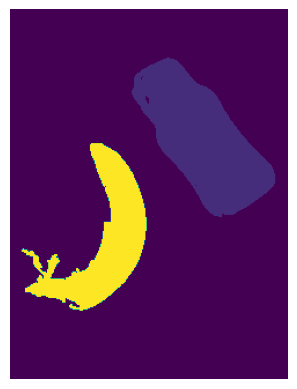

In [ ]:
plt.imshow(components_image)
plt.axis('off')
plt.show()